In [69]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [36]:
def init_params(n):
  w = np.ones((n, 1))
  b = 0
  return w, b

In [75]:
def score(X, y, w, b):
  m = X.shape[1]
  z = np.dot(w.T, X) + b
  a = sigmoid(z)
  y_hat = np.round(a)
  return accuracy_score(y.T, y_hat.T)

In [81]:
def model(X, y, testx, testy, epochs, learning_rate):
  m = X.shape[1]
  n = X.shape[0]
  w, b = init_params(X.shape[0])
  for i in range(epochs+1):
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    assert(y.shape == (1, m))
    assert(z.shape == (1, m))
    assert(a.shape == (1, m))
    cost = -(1/m) * np.sum((y * np.log(a)) + ((1 - y) * np.log(1 - a)))
    if(i%1000 == 0):
      print("cost at iteration", i, ":", cost)
    da = -((y/a) + ((1 - y)/(1 - a)))
    dz = (a * (1 - a)) * da
    dw = (1/m) * np.dot(X, (a - y).T)
    db = (1/m) * np.sum(a - y)
    assert(dw.shape == (n, 1))
    w -= (learning_rate * dw)
    b -= (learning_rate * db)
  train_accuracy = score(X, y, w, b)
  test_accuracy = score(testx, testy, w, b)
  print("Train Accuracy:", train_accuracy)
  print("Test Accuracy:", test_accuracy)
  log = {"w": w,
         "b": b,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
  return log

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/classification.csv")

In [7]:
X = df.drop(columns = "success").to_numpy()
X = ((X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0)))
y = df["success"].to_numpy()

In [8]:
trainx, testx, trainy, testy = train_test_split(X, y, test_size = 0.2)

In [9]:
trainx = trainx.T
testx = testx.T
trainy = trainy.reshape(1, -1)
testy = testy.reshape(1, -1)

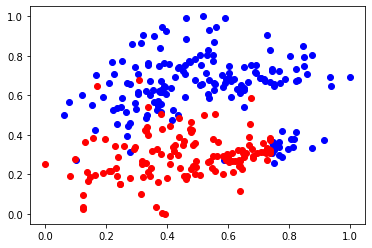

In [10]:
l = []
for i in range(y.shape[0]):
  if(y[i] == 1): l.append(i)
np_succ = X[l]
np_fail = np.delete(X, l, 0)
plt.scatter(np_succ[:, 0], np_succ[:, 1], color = "blue")
plt.scatter(np_fail[:, 0], np_fail[:, 1], color = "red")
plt.show()

In [82]:
log = model(trainx, trainy, testx, testy, 10000, 0.1)

cost at iteration 0 : 0.6477703255717633
cost at iteration 1000 : 0.4029220344674494
cost at iteration 2000 : 0.34545246738431945
cost at iteration 3000 : 0.3201182552691478
cost at iteration 4000 : 0.306095864484133
cost at iteration 5000 : 0.29727592602699615
cost at iteration 6000 : 0.29126892952719374
cost at iteration 7000 : 0.2869538146644844
cost at iteration 8000 : 0.28373452427910023
cost at iteration 9000 : 0.2812641844995754
cost at iteration 10000 : 0.2793268607774059
Train Accuracy: 0.8649789029535865
Test Accuracy: 0.9166666666666666


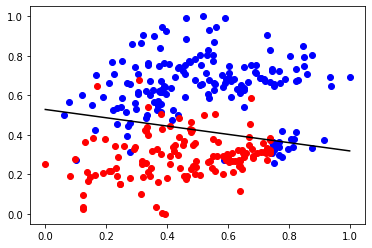

In [83]:
w = log["w"]
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (log["b"]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(np_succ[:, 0], np_succ[:, 1], color = "blue")
plt.scatter(np_fail[:, 0], np_fail[:, 1], color = "red")
plt.show()